## selenium 라이브러리

1. 웹 어플리케이션을 테스트하기 위한 라이브러리
2. python code를 이용하여 웹 브라우저를 제어
3. google chrome의 구버전을 사용시 별도의 소프트웨어 필요 (120 이상부턴 괜찮다 :>)

In [1]:
## 라이브러리 설치

# !pip install selenium

In [3]:
## 어떤 웹 브라우저를 선택해 실행할 지 지정하기 위해 webdriver 설치

from selenium import webdriver

In [4]:
# 웹 브라우저 실행

driver = webdriver.Chrome()

In [5]:
# 웹 브라우저에 주소를 입력

driver.get('https://www.naver.com')

In [6]:
## selenium에서 특정 기능을 로드
    # 사실 webdriver 불러왔기에 이미 사용 가능하지만 짧게 쓰기 위해 따로 로드
    # By == 특정 태그를 찾을 때 ID나 Class, ... 조건으로 검색
    # Keys == 키보드의 이벤트를 발생 시키는 기능

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

- find_element()
    - html 문서에서 특정 태그를 검색 -> 첫 번째 태그를 선택
    - bs4에서 find()와 같은 기능

- find_elements()
    - html 문서에서 특정 태그와 같은 모든 태그를 검색
    - bs4에서 find_all()과 같은 기능

In [7]:
# 네이버 메인 화면에 있는 검색창에 검색어를 입력하는 input 태그를 선택
    # id = query
        # 오 하나밖에 없겠네

element = driver.find_element(By.ID, 'query')

In [10]:
# 검색어를 입력 (특정 문자열을 보낸다.)

element.send_keys('토요일')

In [12]:
# element에서 키보드의 enter 이벤트를 발생

element.send_keys(Keys.ENTER)

In [14]:
# class가 link_tit인 태그를 검색

len(driver.find_elements(By.CLASS_NAME, 'link_tit'))

6

In [15]:
links = driver.find_elements(By.CLASS_NAME, 'link_tit')

In [18]:
# 특정 태그를 마우스 클릭

links[0].click()

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/123.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="토요일 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'토요일\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'토요일\'의 네이버 통합검색 결과입니다."> <title>토요일 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240314.css"> 
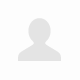
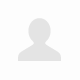
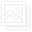
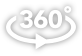
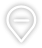

In [19]:
# 웹 브라우저에 있는 html 문서를 출력

driver.page_source # 문자열 형태 -> BeautifulSoup에서 parsing해 사용 가능



In [20]:
# BeautifulSoup를 로드

from bs4 import BeautifulSoup as bs

In [21]:
# html 문서를 파싱

soup = bs(driver.page_source, 'html.parser')

In [23]:
soup.find('title')

# 현재 driver가 첫 번째 탭에 위치해 있는 것을 확인

<title>토요일 : 네이버 통합검색</title>

In [24]:
# 웹 브라우저의 탭의 정보를 출력
    # 탭 하나는 개발자 창 (첫 번째 탭에서 개발자 툴을 열어뒀으니 2번째 탭이 개발자 툴임)
        # 아니 3번째였네

driver.window_handles

['7AC17F5930750EF4A1827516A7198321',
 'B38C82642BAB61DD1191E8A39787EF44',
 '76FDB18E5E02A0E3BACE11CE73299CBC']

In [28]:
# driver의 위치를 이동

driver.switch_to.window(driver.window_handles[1])

In [29]:
soup2 = bs(driver.page_source, 'html.parser')

soup2.find('title')

<title>토요일 - 위키백과, 우리 모두의 백과사전</title>

In [31]:
# soup2에서 div 태그 중 id가 'mw-content-text인 태그를 추출

div_data = soup2.find('div', attrs={'id' : 'mw-content-text'})

In [34]:
# div_data에서 p 태그의 갯수를 확인

len(div_data.find_all('p'))

4

In [35]:
p_list = div_data.find_all('p')

In [39]:
print(type(p_list))

<class 'bs4.element.ResultSet'>


In [42]:
_target = list(map(
    lambda x : x.get_text()
    , p_list
))

In [48]:
_target = list(map(
    lambda x : x.strip(),
    _target
))

In [51]:
_target

['',
 '토요일(土曜日)은 금요일 뒤의 날, 일요일 앞의 날이다. 토요일은 대부분의 서방 국가에서 주말의 일부로 취급한다.',
 "일부 게르만어파 언어에서 토요일은 '사투르누스의 날'(영어: Saturday, 네덜란드어: Zaterdag)을 어원으로 하고 있는데, 사투르누스는 토성을 상징하는 신이므로, 대한민국과 일본에서는 '토요일'로 불린다. 나머지 대부분의 경우 북게르만어 즉 노르만어 위주로는 lördag이라고 한다. 그러나 게르만어의 중심인 독일어는 Samstag[zámsta:k]라고 다르게 부른다. 잠(Sam)이라는 위인/신이 있는가 혹은 아래 라틴어파 sabato 특히 불어를 접해 들어온 것이 아닐까 하는 의견이 있다.",
 "남부 유럽 언어 및 동남아 언어에서 '토요일'이란 낱말은 안식일(샤밭)을 어원으로 하고 있다. 그 예로는 그리스어 Σάββατο, 이탈리아어 sabato, 인도네시아어 sabtu 등이 있다."]

In [52]:
## p_list의 각각의 원소에서 텍스트를 추출하여 새로운 list에 추가
    # 만약 텍스트가 존재하지 않는다면 추가하지 않는다.

_list = []

for i in _target:
    if i:
        _list.append(i)

In [53]:
_list

['토요일(土曜日)은 금요일 뒤의 날, 일요일 앞의 날이다. 토요일은 대부분의 서방 국가에서 주말의 일부로 취급한다.',
 "일부 게르만어파 언어에서 토요일은 '사투르누스의 날'(영어: Saturday, 네덜란드어: Zaterdag)을 어원으로 하고 있는데, 사투르누스는 토성을 상징하는 신이므로, 대한민국과 일본에서는 '토요일'로 불린다. 나머지 대부분의 경우 북게르만어 즉 노르만어 위주로는 lördag이라고 한다. 그러나 게르만어의 중심인 독일어는 Samstag[zámsta:k]라고 다르게 부른다. 잠(Sam)이라는 위인/신이 있는가 혹은 아래 라틴어파 sabato 특히 불어를 접해 들어온 것이 아닐까 하는 의견이 있다.",
 "남부 유럽 언어 및 동남아 언어에서 '토요일'이란 낱말은 안식일(샤밭)을 어원으로 하고 있다. 그 예로는 그리스어 Σάββατο, 이탈리아어 sabato, 인도네시아어 sabtu 등이 있다."]